In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('./chromedriver.exe',options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_2968\2025538577.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe',options=options)


In [3]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [4]:
from selenium.webdriver.common.by import By

In [5]:
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [6]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info)

588

In [7]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [8]:
star_info = []

for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]

    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [9]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [10]:
gu_list = list(set(df_star["구"]))
gu_list

['강남구',
 '구로구',
 '중구',
 '강북구',
 '송파구',
 '강동구',
 '중랑구',
 '광진구',
 '관악구',
 '서대문구',
 '마포구',
 '동작구',
 '양천구',
 '동대문구',
 '종로구',
 '은평구',
 '강서구',
 '영등포구',
 '성북구',
 '서초구',
 '금천구',
 '도봉구',
 '성동구',
 '용산구',
 '노원구']

In [11]:
edi_url = "https://www.ediya.com/contents/find_store.html"
driver = webdriver.Chrome("./chromedriver.exe")
driver.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_2968\3734896788.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("./chromedriver.exe")


In [12]:
wd.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
wd.find_element(By.XPATH, '//*[@id="keyword"]').clear
wd.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 강남구")
wd.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')

info

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a"}
  (Session info: chrome=104.0.5112.81)
Stacktrace:
Backtrace:
	Ordinal0 [0x010C78B3+2193587]
	Ordinal0 [0x01060681+1771137]
	Ordinal0 [0x00F741A8+803240]
	Ordinal0 [0x00FA24A0+992416]
	Ordinal0 [0x00FA273B+993083]
	Ordinal0 [0x00FCF7C2+1177538]
	Ordinal0 [0x00FBD7F4+1103860]
	Ordinal0 [0x00FCDAE2+1170146]
	Ordinal0 [0x00FBD5C6+1103302]
	Ordinal0 [0x00F977E0+948192]
	Ordinal0 [0x00F986E6+952038]
	GetHandleVerifier [0x01370CB2+2738370]
	GetHandleVerifier [0x013621B8+2678216]
	GetHandleVerifier [0x011517AA+512954]
	GetHandleVerifier [0x01150856+509030]
	Ordinal0 [0x0106743B+1799227]
	Ordinal0 [0x0106BB68+1817448]
	Ordinal0 [0x0106BC55+1817685]
	Ordinal0 [0x01075230+1856048]
	BaseThreadInitThunk [0x7755FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77EB7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77EB7A6E+238]


In [13]:
edi_info = []



for gu in gu_list:
    driver.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH,'//*[@id="keyword"]').clear
    driver.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

697

In [14]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
692,용산청파점,용산구,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)"
693,용산효창점,용산구,서울 용산구 효창원로66길 2 (효창동)
694,용산후암점,용산구,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)"
695,원효로점,용산구,서울 용산구 원효로 257 (원효로1가)
696,이태원역점,용산구,서울 용산구 이태원로 176 (이태원동)


In [15]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,강남구,89
1,구로구,12
2,중구,53
3,강북구,6
4,송파구,34
5,강동구,17
6,중랑구,7
7,광진구,19
8,관악구,12
9,서대문구,21


In [16]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,강남구,44
1,구로구,28
2,중구,29
3,강북구,20
4,송파구,39
5,강동구,27
6,중랑구,27
7,광진구,24
8,관악구,56
9,서대문구,0


In [17]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,강남구,44,89,-45
1,구로구,28,12,16
2,중구,29,53,-24
3,강북구,20,6,14
4,송파구,39,34,5
5,강동구,27,17,10
6,중랑구,27,7,20
7,광진구,24,19,5
8,관악구,56,12,44
9,서대문구,0,21,-21


In [18]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './D2Coding-Ver1.3.2-20180524.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\admin\AppData\Local\Temp\ipykernel_2968\1162812789.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


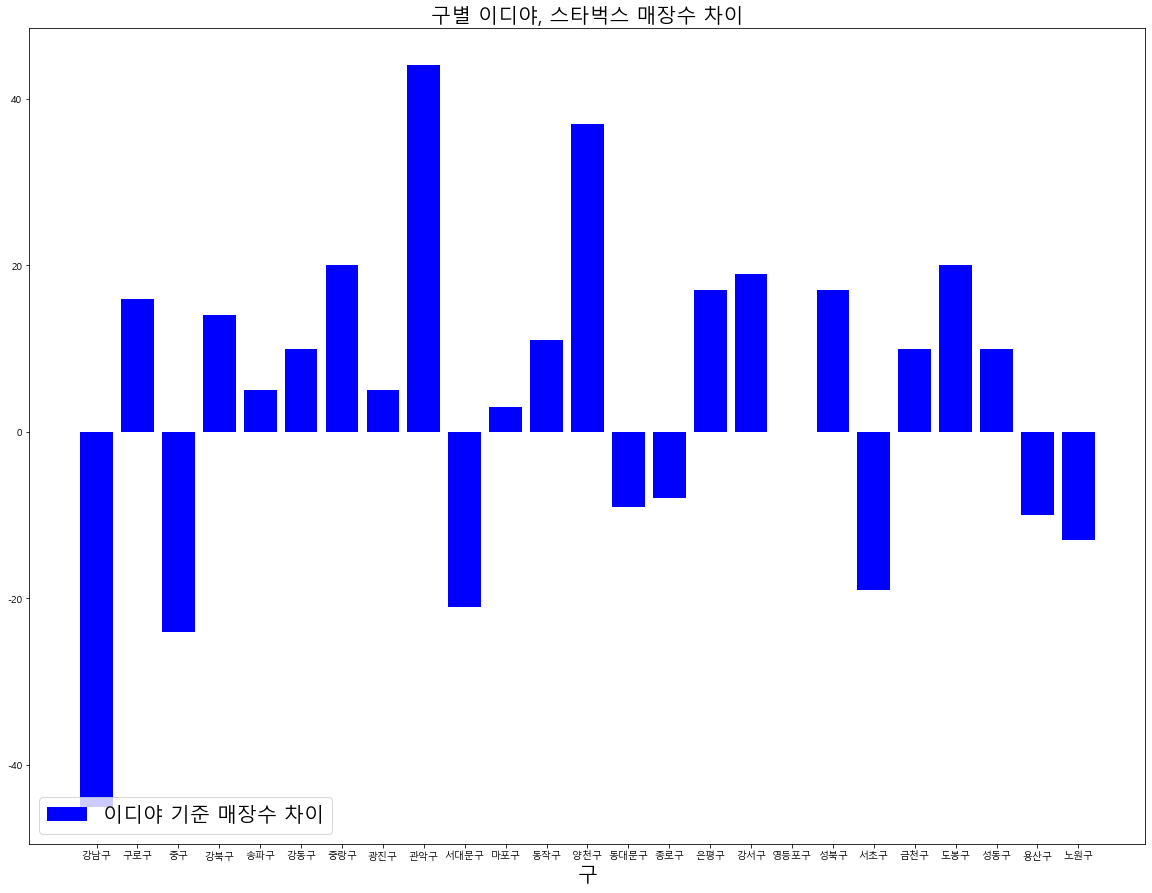

In [24]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
# plt.rcParams['axes.unicode_minus'] = False # - 부호 깨질 때 넣을 것
plt.show()

In [20]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Display',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'cmex10',
 'cmss10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmmi10',
 'cmsy10',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'cmb10',
 'STIXSizeTwoSym',
 'cmtt10',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'cmr10',
 'Segoe UI',
 'Wide Latin',
 'Gill Sans MT Condensed',
 'Castellar',
 'Palace Script MT',
 'Cooper Black',
 'Mistral',
 'Kristen ITC',
 'Gabriola',
 'Berlin Sans FB',
 'Lucida Bright',
 'Candara',
 'Playbill',
 'Gill Sans MT',
 'Papyrus',
 'Tw Cen MT',
 'Arial',
 'Gigi',
 'Ravie',
 'Impact',
 'High Tower Text',
 'Maiandra GD',
 'Yu Gothic',